In [1]:
import pandas as pd
import pickle
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
%matplotlib inline
from lbs.coiledcoils.parsers import parse_marcoil, parse_deepcoil, parse_pcoils, parse_multicoil2, parse_pcoils_toolkit


In [2]:
from sklearn.metrics import auc, roc_curve
def get_roc(true,predict):
    fpr, tpr, thresh  = roc_curve(true, predict, pos_label=1)
    au = auc(fpr, tpr)
    return fpr, tpr, au

In [3]:
### Olek's functions
def get_percoil_prob(probs):
    cnt = 0
    p = 0
    dw = 0 
    for prob in probs:
        if prob > 0.5:
            p+=prob
            cnt+=1
        dw+=prob
    dw/=len(probs)
    if cnt:
        p/=cnt
        return p
    else:
        return dw
    
def parse_cch(fn):
    f = open(fn)
    line = f.readlines()[0].split('=')[1]
    return float(line)

In [4]:
def get_roc_benchmarks(df, get_best_pcoils_only=True, perres=True):
    true_labels = []
    deepcoil_seq_preds = []
    deepcoil_pssm_preds = []
    marcoil_preds = []
    multicoil2_preds = []
    pcoils_14_preds = []
    pcoils_21_preds = []
    pcoils_28_preds = []
    coils_14_preds = []
    coils_21_preds = []
    coils_28_preds = []
    cchmm_prof_preds = []
    ### Iterate over each entry in df
    for key, value in df.iterrows():
        ### Get true labels
        if perres:
            for label in list(value['socket_assignment']):
                true_labels.append(int(label))
        else:
            true_labels.append(int(value['cc']))
            
        ### Get DeepCoil_SEQ preds
        preds = parse_deepcoil('./../2_Benchmark_Other_Methods/deepcoil/deepcoil_seq_probs/%s.out' % key)
        if perres:
            for pred in preds:
                deepcoil_seq_preds.append(pred)
        else:
            deepcoil_seq_preds.append(get_percoil_prob(preds))
            
        ### Get DeepCoil_PSSM preds
        preds = parse_deepcoil('./../2_Benchmark_Other_Methods/deepcoil/deepcoil_pssm_probs/%s.out' % key)
        if perres:
            for pred in preds:
                deepcoil_pssm_preds.append(pred)
        else:
            deepcoil_pssm_preds.append(get_percoil_prob(preds))
            
        ### Get Marcoil preds
        preds = parse_marcoil('./../2_Benchmark_Other_Methods/marcoil/results/%s.problist' % key)
        if perres:
            for pred in preds:
                marcoil_preds.append(pred)
        else:
            marcoil_preds.append(get_percoil_prob(preds))
            
        ### Get PCoils_14 preds
        preds = parse_pcoils_toolkit('./../2_Benchmark_Other_Methods/pcoils/pcoils_toolkit/%s.numerical' % key, window='14')
        if perres:
            for pred in preds:
                pcoils_14_preds.append(pred)
        else:
            pcoils_14_preds.append(get_percoil_prob(preds))
            
        ### Get PCoils_21 preds
        preds = parse_pcoils_toolkit('./../2_Benchmark_Other_Methods/pcoils/pcoils_toolkit/%s.numerical' % key, window='21')
        if perres:
            for pred in preds:
                pcoils_21_preds.append(pred)
        else:
            pcoils_21_preds.append(get_percoil_prob(preds))
            
        ### Get PCoils_28 preds
        preds = parse_pcoils_toolkit('./../2_Benchmark_Other_Methods/pcoils/pcoils_toolkit/%s.numerical' % key, window='28')
        if perres:
            for pred in preds:
                pcoils_28_preds.append(pred)
        else:
            pcoils_28_preds.append(get_percoil_prob(preds))
            
        ### Get Coils_14 preds
        preds = parse_pcoils('./../2_Benchmark_Other_Methods/coils/results/%s.coils_n14' % key)
        if perres:
            for pred in preds:
                coils_14_preds.append(pred)
        else:
            coils_14_preds.append(get_percoil_prob(preds))
            
        ### Get Coils_21 preds
        preds = parse_pcoils('./../2_Benchmark_Other_Methods/coils/results/%s.coils_n21' % key)
        if perres:
            for pred in preds:
                coils_21_preds.append(pred)
        else:
            coils_21_preds.append(get_percoil_prob(preds))
            
        ### Get Coils_28 preds
        preds = parse_pcoils('./../2_Benchmark_Other_Methods/coils/results/%s.coils_n28' % key)
        if perres:
            for pred in preds:
                coils_28_preds.append(pred)
        else:
            coils_28_preds.append(get_percoil_prob(preds))
            
        ### Get Multicoil2 preds
        preds = parse_multicoil2('./../2_Benchmark_Other_Methods/multicoil2/results/%s.out' % key)
        if perres:
            for pred in preds:
                multicoil2_preds.append(pred)
        else:
            multicoil2_preds.append(get_percoil_prob(preds))
        if not perres:
            pred = parse_cch('./../2_Benchmark_Other_Methods/cchmmprof/results/%s.profile' % key)
            cchmm_prof_preds.append(pred)
    results = {}
    results['DeepCoil_SEQ'] = get_roc(true_labels, deepcoil_seq_preds)
    results['DeepCoil_PSSM'] = get_roc(true_labels, deepcoil_pssm_preds)
    results['Marcoil'] = get_roc(true_labels, marcoil_preds)
    results['PCoils_14'] = get_roc(true_labels, pcoils_14_preds)
    results['PCoils_21'] = get_roc(true_labels, pcoils_21_preds)
    results['PCoils_28'] = get_roc(true_labels, pcoils_28_preds)
    results['Coils_14'] = get_roc(true_labels, coils_14_preds)
    results['Coils_21'] = get_roc(true_labels, coils_21_preds)
    results['Coils_28'] = get_roc(true_labels, coils_28_preds)
    results['Multicoil2'] = get_roc(true_labels, multicoil2_preds)
    
    if not perres:
        results['CCHMM_PROF'] = get_roc(true_labels, cchmm_prof_preds)
    return results

In [5]:
def get_best_pcoils_only(res):
    if res['PCoils_14'][2] > res['PCoils_21'][2] and res['PCoils_14'][2] > res['PCoils_28'][2]:
        res.pop('PCoils_21')
        res.pop('PCoils_28')
    if res['PCoils_21'][2] > res['PCoils_14'][2] and res['PCoils_21'][2] > res['PCoils_28'][2]:
        res.pop('PCoils_14')
        res.pop('PCoils_28')
    else:
        res.pop('PCoils_14')
        res.pop('PCoils_21')
    if res['Coils_14'][2] > res['Coils_21'][2] and res['Coils_14'][2] > res['Coils_28'][2]:
        res.pop('Coils_21')
        res.pop('Coils_28')
    if res['Coils_21'][2] > res['Coils_14'][2] and res['Coils_21'][2] > res['Coils_28'][2]:
        res.pop('Coils_14')
        res.pop('Coils_28')
    else:
        res.pop('Coils_14')
        res.pop('Coils_21')
    return res

def get_pcoils21_only(res):
    res.pop('PCoils_14')
    res.pop('PCoils_28')
    res.pop('Coils_14')
    res.pop('Coils_28')
    return res

In [6]:
def get_roc_plot(results):
    plt.figure(figsize=(5,5))
    colors = ['red', 'orange', 'green', 'lightblue', 'darkred', 'darkred', 'darkred', 'black', 'black', 'black',
              'gray']
    order = ['DeepCoil_PSSM', 'DeepCoil_SEQ', 'Marcoil', 'Multicoil2', 'PCoils_14', 'PCoils_21', 'PCoils_28',
             'Coils_28', 'Coils_21', 'Coils_14', 'CCHMM_PROF']
    color_dict = {method: color for method, color in zip(order, colors)}
    for method, data in sorted(results.items(), key=lambda kv: kv[1][2], reverse=True):
        try:
            label='%s (AUC = %0.2f)' % (method, data[2])
            plt.plot(data[0], data[1], label=label, color=color_dict[method], linewidth=2)
        except KeyError:
            pass
    plt.plot([0, 1], [0, 1], color='black', ls='--')
    plt.legend()
    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.tight_layout()
    ax = plt.gca()
    ax.set_aspect('equal')

## Test set

In [7]:
df_test = pickle.load(open('./../4_Train/out/pssm/test_results.p', 'rb'))

#### Localization task

In [8]:
results = get_roc_benchmarks(df_test, perres=True)

In [9]:
results_auc = {}
for key, value in results.items():
    results_auc[key] = value[2]
df = pd.DataFrame.from_dict(results_auc, orient='index')

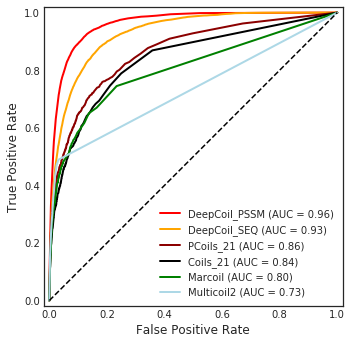

In [10]:
get_roc_plot(get_pcoils21_only(results))
plt.savefig('TEST_LOCALIZATION.tiff', dpi=300)

#### Detection task

In [11]:
results = get_roc_benchmarks(df_test, perres=False)

In [12]:
results_auc = {}
for key, value in results.items():
    results_auc[key] = value[2]
df = pd.concat([df, pd.DataFrame.from_dict(results_auc, orient='index')], axis=1, sort=True)

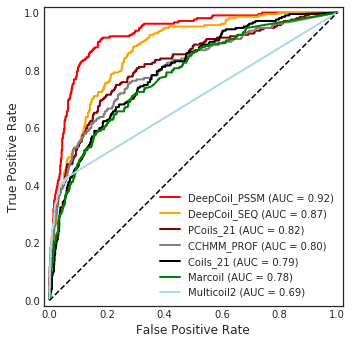

In [13]:
get_roc_plot(get_pcoils21_only(results))
plt.savefig('TEST_DETECTION.tiff', dpi=300)

## Li (2016) test set

#### Localization task

In [14]:
df_test = pickle.load(open('./../4_Train/out/pssm/li2016_results.p', 'rb'))

In [15]:
results = get_roc_benchmarks(df_test, perres=True)

In [16]:
results_auc = {}
for key, value in results.items():
    results_auc[key] = value[2]
df = pd.concat([df, pd.DataFrame.from_dict(results_auc, orient='index')], axis=1, sort=True)

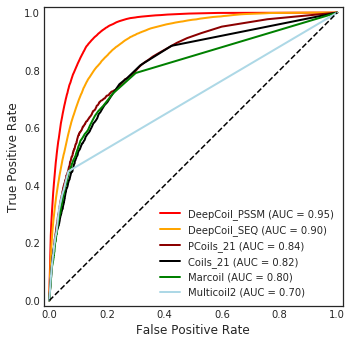

In [17]:
get_roc_plot(get_pcoils21_only(results))
plt.savefig('Li2016_LOCALIZATION.tiff', dpi=300)

#### Detection task

In [18]:
results = get_roc_benchmarks(df_test, perres=False)

In [19]:
results_auc = {}
for key, value in results.items():
    results_auc[key] = value[2]
df = pd.concat([df, pd.DataFrame.from_dict(results_auc, orient='index')], axis=1, sort=True)

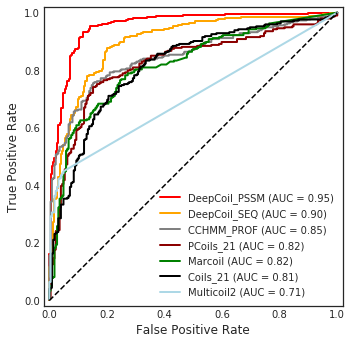

In [20]:
get_roc_plot(get_pcoils21_only(results))
plt.savefig('Li2016_DETECTION.tiff', dpi=300)

In [21]:
df.columns = ['TEST_Localization', 'TEST_Detection', 'Li2016_Localization', 'Li2016_Detection']

## AUC values

In [22]:
df.sort_values(by='TEST_Localization', ascending=False)

,TEST_Localization,TEST_Detection,Li2016_Localization,Li2016_Detection
DeepCoil_PSSM,0.961127,0.922147,0.946220,0.953915
DeepCoil_SEQ,0.928676,0.866790,0.903292,0.896517
PCoils_21,0.864308,0.817946,0.835319,0.822226
PCoils_28,0.860260,0.824230,0.836800,0.833189
PCoils_14,0.850963,0.795139,0.816068,0.810268
Coils_21,0.836075,0.793865,0.815862,0.813487
Coils_14,0.832413,0.760240,0.803616,0.767963
Marcoil,0.802917,0.780833,0.796999,0.817921
Coils_28,0.802769,0.806202,0.788766,0.822795
Multicoil2,0.732110,0.690611,0.695089,0.706025
